In [1]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import LancasterStemmer

from PIL import Image
from collections import Counter

In [2]:
df = pd.read_csv('all_review_.csv')
df

,Unnamed: 0,STAR,CONTENT
0,0,5,Seoul tower is very peacfull and one of clean ...
1,1,4,We have walked up and down It is a good walk ...
2,2,4,It was a bit late to open and it was raining ...
3,3,5,It was nice to be able to see the beautiful n...
4,4,5,Got there at dusk By the time we got into the ...
...,...,...,...
15460,15466,5,Dream of a very well planned place
15461,15467,5,Christmas organized the event very beautifully
15462,15468,4,Wow
15463,15469,5,Excelente experiencia


In [3]:
df=df.dropna()

In [4]:
df.isnull().sum()

Unnamed: 0    0
STAR          0
CONTENT       0
dtype: int64

In [5]:
#불용어 추가
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
#add_stop_words = ["'", ",", "'s", ":", ".", "?", "!","(",")","n't","korea","korean","good","like","awesome","perfect","nice","well","great","seoul","expensive","beautiful","wonderful","view","views","city","place","visit","tower","just","lotte","world","went","lotte","tower","street","lot","lots","ddp","insadong","places","bookstore","bookstores","books","kyobo","lotte","aquarium","feel","animals","park","animals","coex","mall","great","pretty","best"]
add_stop_words = ["'", ",", "'s", ":", ".", "?", "!","(",")","n't","korea","korean","go","went","just","seoul","visit","lot","lots","feel"]
for word in add_stop_words:
    stop_words.add(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
text = df[['CONTENT']]
text

,CONTENT
0,Seoul tower is very peacfull and one of clean ...
1,We have walked up and down It is a good walk ...
2,It was a bit late to open and it was raining ...
3,It was nice to be able to see the beautiful n...
4,Got there at dusk By the time we got into the ...
...,...
15460,Dream of a very well planned place
15461,Christmas organized the event very beautifully
15462,Wow
15463,Excelente experiencia


In [7]:
from nltk.stem import WordNetLemmatizer
text = df[['CONTENT']]

text_arr=[[]for i in range(len(df['CONTENT']))]
#토큰화
text['CONTENT'] = text.apply(lambda row: nltk.word_tokenize(row['CONTENT']), axis=1)

#불용어 처리
text['CONTENT'] = text['CONTENT'].apply(lambda x: [word.lower() for word in x])
text['CONTENT'] = text['CONTENT'].apply(lambda x: [word for word in x if word not in (stop_words)])

#표제어 추출
text['CONTENT'] = text['CONTENT'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
    
#길이가 3이하인 단어에 대해서 제거하는 작업을 수행
tokenized_doc = text['CONTENT'].apply(lambda x : [word for word in x if len(word) > 3])
    
#tf-idf 행렬을 만들기 위해 역토큰화
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
text['CONTENT'] = detokenized_doc
    
text_arr=[]

for i in text['CONTENT']:
    i=i.split()
    text_arr.append(i)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14276\550990889.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['CONTENT'] = text.apply(lambda row: nltk.word_tokenize(row['CONTENT']), axis=1)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14276\550990889.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['CONTENT'] = text['CONTENT'].apply(lambda x: [word.lower() for word in x])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14276\550990889.py:10: SettingWithCopyWarni

In [8]:
text_arr

[['tower',
  'peacfull',
  'clean',
  'place',
  'life',
  'beautiful',
  'city',
  'view',
  'fantastic',
  'garden',
  'tree',
  'highly',
  'suggest',
  'must',
  'book',
  'list',
  'come',
  'place',
  'love',
  'spend',
  'time'],
 ['walk',
  'good',
  'walk',
  'side',
  'stairs',
  'path',
  'forest',
  'visibility',
  'bite',
  'poor',
  'expect',
  'cloudy',
  'weather'],
 ['bite', 'late', 'open', 'rain', 'hard', 'wait', 'outside', 'still', 'good'],
 ['nice', 'able', 'beautiful', 'night', 'view'],
 ['dusk',
  'time',
  'tower',
  'dark',
  'would',
  'better',
  'earlier',
  'foothills',
  'time',
  'wouldnt',
  'allow',
  'stun',
  'view',
  'city'],
 ['long',
  'time',
  'since',
  'visit',
  'mother',
  'children',
  'night',
  'view',
  'even',
  'weekend',
  'many',
  'visitors',
  'kosiguk'],
 ['years',
  'didnt',
  'like',
  'much',
  'joke',
  'expensive',
  'offer',
  'seem',
  'attractions',
  'south',
  'kpop',
  'kdramas',
  'palaces',
  'anything'],
 ['overlook']

In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(text_arr).transform(text_arr)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [10]:
df

,000won,015min,020305,030504,04340,0801,0900,09001900,0930,1000,...,zone,zonemagic,zookeeper,zookeepers,zoom,zoomin,zoomy,zoos,zucchini,zumagansan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
df=pd.DataFrame(frequent_itemsets)
#association_rules(frequent_itemsets, metric="lift", min_threshold=1)
df['length']=df['itemsets'].apply(lambda x:len(x))
df = df[(df['length']==2)&(df['support']>=0.01)].sort_values(by='support',ascending=False)


In [12]:
df

,support,itemsets,length
87,0.156288,"(view, tower)",2
83,0.091562,"(view, take)",2
82,0.091497,"(tower, take)",2
62,0.084837,"(tower, cable)",2
63,0.084707,"(view, cable)",2
65,0.083802,"(view, city)",2
75,0.079082,"(shop, place)",2
64,0.073068,"(tower, city)",2
89,0.070676,"(view, walk)",2
88,0.069124,"(tower, walk)",2


In [13]:
G=nx.Graph()
edges=[]
for i in df['itemsets']:
    i=tuple(i)
    edges.append(i)


G.add_edges_from(edges)


In [14]:
#association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [15]:
import scipy.stats
pr=nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))

C:\ProgramData\Anaconda3\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


In [16]:
pos = pos=nx.spring_layout(G)

findfont: Font family ['framd.ttf'] not found. Falling back to DejaVu Sans.


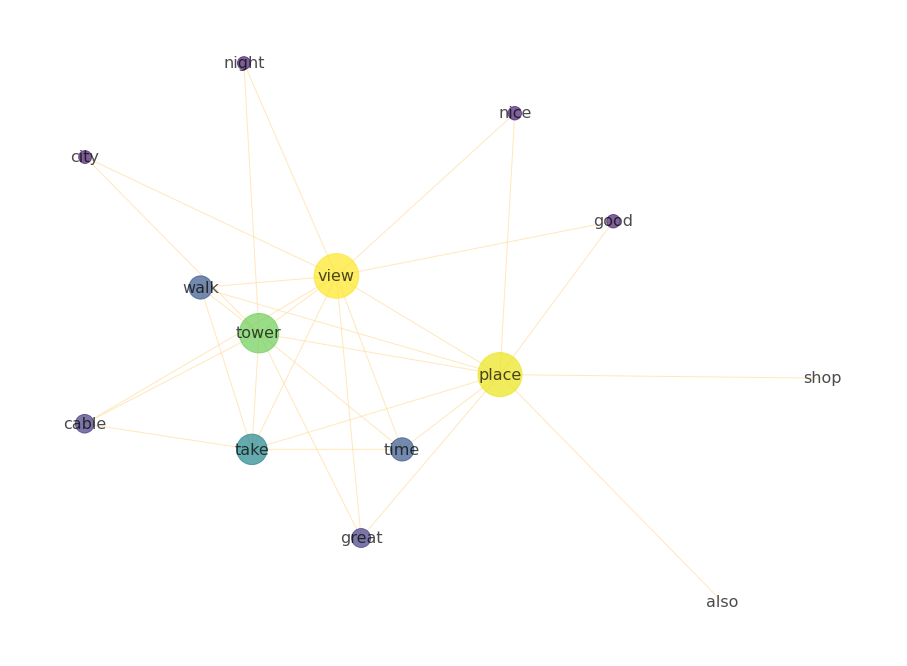

In [17]:
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx(G,font_family='framd.ttf',font_size=16,pos=pos,node_color=list(pr.values()),node_size=nsize,alpha=0.7,edge_color='#FFDEA2')
plt.savefig("network1.png")

In [19]:
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel

dictionary =Dictionary(text_arr)
corpus =[dictionary.doc2bow(text) for text in text_arr]
coherence_values=[]
for i in range(2,15):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=i,id2word=dictionary)
    coherence_model_lda=CoherenceModel(model=ldamodel,texts=text_arr,dictionary=dictionary,topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

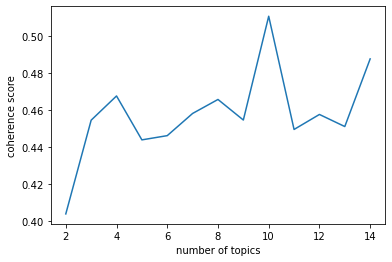

In [20]:
x=range(2,15)
plt.plot(x,coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()